# Label & Ordinal Encoding — From Beginner to Pro

**Objective**: Learn **what**, **why**, and **how** of **Label** and **Ordinal Encoding** using a **real-world customer survey**.

---

## 1. Introduction

### What Are Categorical Variables?

Variables that contain **labels** instead of numbers:

| Type | Example | Has Order? |
|------|--------|------------|
| **Nominal** | `City: Delhi, Mumbai, Bangalore` | No |
| **Ordinal** | `Rating: Poor, Fair, Good, Excellent` | Yes |

### Why Do ML Models Need Encoding?

- Algorithms **only understand numbers**
- Cannot do math on strings: `"Good" + "Poor"` → Error
- Scikit-learn expects `int` or `float`

### What is `fit`, `transform`, and `fit_transform`?

| Term | Meaning | Example |
|------|-------|--------|
| **fit** | Learn the mapping from data | See categories: `['Poor', 'Good']` → assign `0, 1` |
| **transform** | Apply the learned mapping | `'Good'` → `1` |
| **fit_transform** | Do both in one step | Learn + apply on same data |

> **Important**: `fit` on **train data only** → avoid **data leakage**

## 2. Real-World Example: Customer Satisfaction Survey

We collected feedback from 6 customers:

| Customer | City | Satisfaction |
|--------|------|--------------|
| 1 | Delhi | Good |
| 2 | Mumbai | Poor |
| 3 | Bangalore | Excellent |
| 4 | Delhi | Fair |
| 5 | Mumbai | Good |
| 6 | Bangalore | Poor |

We want to predict **future satisfaction** → need to encode `City` and `Satisfaction`.

In [14]:
import pandas as pd

# Create dataset
df = pd.DataFrame({
    'city': ['Delhi', 'Mumbai', 'Bangalore', 'Delhi', 'Mumbai', 'Bangalore'],
    'satisfaction': ['Good', 'Poor', 'Excellent', 'Fair', 'Good', 'Poor']
})

print("Customer Survey Data:")
df

Customer Survey Data:


,city,satisfaction
0,Delhi,Good
1,Mumbai,Poor
2,Bangalore,Excellent
3,Delhi,Fair
4,Mumbai,Good
5,Bangalore,Poor


---

## 3. Label Encoding — For Nominal Data (No Order)

**Use Case**: `city` → no natural order

**Goal**: Convert `Delhi, Mumbai, Bangalore` → `0, 1, 2`

**Warning**: Model may think `2 > 1` → **false relationship**

### Step-by-Step: Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Create encoder
le = LabelEncoder()

# Step 2: FIT → learn mapping
le.fit(df['city'])

print("Categories learned:", le.classes_)
print("Mapping: Bangalore=0, Delhi=1, Mumbai=2")

Categories learned: ['Bangalore' 'Delhi' 'Mumbai']
Mapping: Bangalore=0, Delhi=1, Mumbai=2


In [16]:
# Step 3: TRANSFORM → apply mapping
df['city_encoded'] = le.transform(df['city'])

print("\nAfter Label Encoding:")
df[['city', 'city_encoded']]


After Label Encoding:


,city,city_encoded
0,Delhi,1
1,Mumbai,2
2,Bangalore,0
3,Delhi,1
4,Mumbai,2
5,Bangalore,0


In [17]:
# Step 4: INVERSE → decode back
df['city_decoded'] = le.inverse_transform(df['city_encoded'])
df[['city', 'city_encoded', 'city_decoded']]

,city,city_encoded,city_decoded
0,Delhi,1,Delhi
1,Mumbai,2,Mumbai
2,Bangalore,0,Bangalore
3,Delhi,1,Delhi
4,Mumbai,2,Mumbai
5,Bangalore,0,Bangalore


### Visualization: Arbitrary Assignment

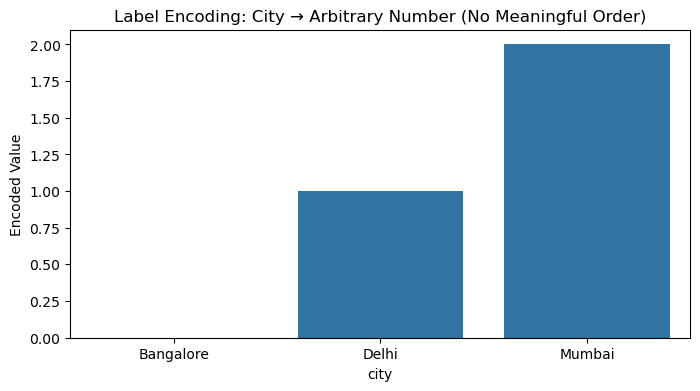

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x='city', y='city_encoded', data=df.drop_duplicates().sort_values('city_encoded'))
plt.title('Label Encoding: City → Arbitrary Number (No Meaningful Order)')
plt.ylabel('Encoded Value')
plt.show()

### Pros & Cons of Label Encoding

| Pros | Cons |
|------|------|
| Fast & simple | **False order** (Mumbai > Delhi?) |
| Works with **tree models** | Hurts **linear models** |
| Low memory | Not interpretable |

> **Best for**: Tree models (Random Forest, XGBoost) on **nominal data**

---

## 4. Ordinal Encoding — For Ranked Data

**Use Case**: `satisfaction` → clear order: `Poor < Fair < Good < Excellent`

**Goal**: Assign numbers that **respect rank**

### Step-by-Step: Ordinal Encoding

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Define correct order
order = [['Poor', 'Fair', 'Good', 'Excellent']]

# Step 2: Create encoder with order
oe = OrdinalEncoder(categories=order)

# Step 3: FIT + TRANSFORM
df['satisfaction_encoded'] = oe.fit_transform(df[['satisfaction']]).flatten()

print("Defined Order:", order[0])
print("\nAfter Ordinal Encoding:")
df[['satisfaction', 'satisfaction_encoded']]

Defined Order: ['Poor', 'Fair', 'Good', 'Excellent']

After Ordinal Encoding:


,satisfaction,satisfaction_encoded
0,Good,2.0
1,Poor,0.0
2,Excellent,3.0
3,Fair,1.0
4,Good,2.0
5,Poor,0.0


### Visualization: Meaningful Rank

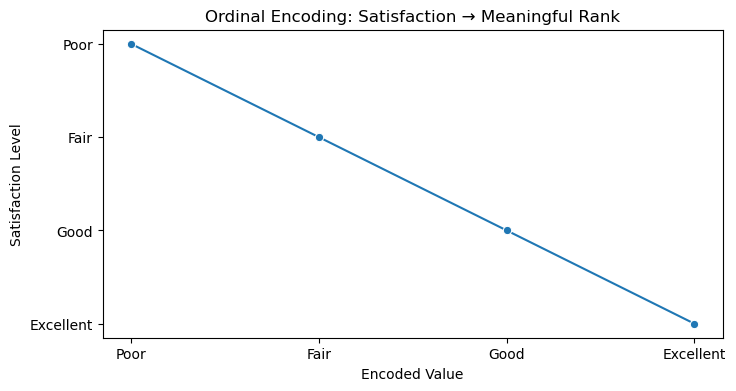

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='satisfaction_encoded', y='satisfaction', data=df.sort_values('satisfaction_encoded'), marker='o')
plt.title('Ordinal Encoding: Satisfaction → Meaningful Rank')
plt.xlabel('Encoded Value')
plt.ylabel('Satisfaction Level')
plt.xticks([0, 1, 2, 3], ['Poor', 'Fair', 'Good', 'Excellent'])
plt.show()

### Pros & Cons of Ordinal Encoding

| Pros | Cons |
|------|------|
| **Preserves true order** | **Must define order manually** |
| Works with **all models** | Wrong order → worse results |
| Interpretable | Assumes **equal gaps** |

> **Best for**: Features with **natural ranking**

---

## 5. Comparison Summary

| Feature | Label Encoding | Ordinal Encoding |
|--------|----------------|------------------|
| **Order** | Arbitrary | Meaningful |
| **Use For** | `city`, `color` | `rating`, `education` |
| **Best Model** | Trees | Linear + Trees |
| **Risk** | False relationship | Wrong order |

**Key Takeaway**:
> Use **Label Encoding** for **unordered categories** in **tree models**  
> Use **Ordinal Encoding** when **rank matters**  
> For **nominal data in linear models** → use **One-Hot Encoding** (next)

---
**End of Notebook**